<a href="https://github.com/AI-FREE-Team/Machine-Learning-Basic/blob/main/Materials/%E7%B5%B1%E8%A8%88%E6%A6%82%E5%BF%B5_%E9%9B%A2%E7%BE%A4%E5%80%BC_%E5%81%8F%E5%B3%B0%E6%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/README_imgs/aifreeteam.png) 
<center>Welcome to the course《Python: from business analytics to Artificial Intelligence》by AI . FREE Team.</center>
<center>歡迎大家來到 AI . FREE Team 《Python 從商業分析到人工智慧》的第二堂課 - 機器學習(ML)基礎教學。 </center>
<br/>

<center>作者: Michelle Chuang (<a href="https://github.com/sueshow">Github</a>)</center>
<center>AI . FREE Team: <a href="https://aifreeblog.herokuapp.com/">https://aifreeblog.herokuapp.com/</a></center>
<br>


# 前言

本篇文章以 <font color="#00dd00">**Python**</font> 3.7.10、<font color="#00dd00">**Numpy**</font> 1.19.5、<font color="#00dd00">**Pandas**</font> 1.1.5、<font color="#00dd00">**Matplotlib**</font> 3.2.2、<font color="#00dd00">**Seaborn**</font> 0.11.1、<font color="#00dd00">**SciPy**</font> 1.4.1 進行教學。本篇文章將介紹如何偵測及處理離群值，以及瞭解分佈的樣貌。

## 匯入基本套件

In [ ]:
!python --version

Python 3.7.11


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt   # 繪製影像 
import seaborn as sns
import scipy as sp

print( 'NumPy 版本: ', np.__version__ )
print( 'Pandas 版本: ', pd.__version__ )  
print( 'Matplotlib 版本: ', matplotlib.__version__ )
print( 'Seaborn 版本: ', sns.__version__ )
print( 'SciPy 版本: ', sp.__version__ )

NumPy 版本:  1.19.5
Pandas 版本:  1.1.5
Matplotlib 版本:  3.2.2
Seaborn 版本:  0.11.1
SciPy 版本:  1.4.1


在此並匯入在這篇文章常用到的套件 `stats` 喔！

In [ ]:
from scipy import stats

# 離群值(Outlier/Noise)

* 平均值是通過將我們想要的所有值相加並除以項目數來計算的，而中位數是通過簡單地重新排列項目來找到的。如果我們的數據中有異常值，即遠高於或低於其他值的項目，則可能會對均值產生不利影響。也就是說，均值對異常值不穩健。
* 在統計中，離群值是不屬於某個群體的數據點。這是一個遠離其他值的異常觀察。異常值是與其他結構良好的數據不同的觀察結果。檢測離群值或異常是在數據挖掘中的核心問題之一。在為機器學習模型準備數據集時，檢測所有異常值並去除它們或分析它們以了解為什麼首先將它們放在那裡非常重要。

* 辨識異常值/離群值 (Anomaly/Outlier) 的方法：
  1. 常態分佈：5% 的資料在兩個標準差外，0.3% 的資料在三個標準差外
  2. 四分位數 (箱形圖)：小於 (Q1-1.5IQR) 或大於 (Q3+1.5IQR)
  3. 散步圖

* 我們將使用包含在 sklearn 數據集 API 中的波士頓房屋定價數據集。

In [ ]:
from sklearn import datasets

boston = datasets.load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

In [ ]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 常態分佈

* 在統計學中，如果數據分佈近似正態，那麼大約 68% 的數據值位於平均值的一個標準偏差內，大約 95% 位於兩個標準偏差內，大約 99.7% 位於三個標準偏差內。
* 偏差多少才算異常呢？在解決這個問題，我們先了解 Z-Score 是甚麼，當標準差不為 0 且不為較接近於 0 的數時，Z-Score 代表測量值距均值相差的標準差數，通常當 Z-Score 的絕對值大於3將視為異常：

![常態分佈](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content/distrubution.jpeg)

In [ ]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [ ]:
find_anomalies(boston_df['DIS'])

[10.7103, 10.7103, 12.1265, 10.5857, 10.5857]

查看上面的代碼和輸出，很難說哪個數據點是異常值。讓我們嘗試定義一個閾值來識別異常值。

### 偵測

In [ ]:
z_dis = np.abs(stats.zscore(boston_df['DIS']))
print(z_dis)

[1.40213603e-01 5.57159875e-01 5.57159875e-01 1.07773662e+00
 1.07773662e+00 1.07773662e+00 8.39243922e-01 1.02463789e+00
 1.08719646e+00 1.32963473e+00 1.21297914e+00 1.15593484e+00
 7.87143464e-01 4.33754047e-01 3.17003386e-01 3.34449434e-01
 3.34449434e-01 2.20028082e-01 6.92761271e-04 6.92761271e-04
 1.35827806e-03 1.03277421e-01 8.64493539e-02 1.42685523e-01
 2.87387889e-01 3.13533191e-01 4.21632134e-01 3.12962749e-01
 3.13580728e-01 2.11043605e-01 2.08191390e-01 1.80619980e-01
 9.26766896e-02 3.72817172e-03 1.67532861e-02 2.06663257e-01
 1.98296760e-01 6.61510917e-02 2.48415135e-02 7.63470081e-01
 7.63470081e-01 9.15493132e-01 9.15493132e-01 9.15493132e-01
 9.15493132e-01 6.20526581e-01 6.20526581e-01 9.00519004e-01
 9.86370670e-01 1.08985853e+00 1.43545190e+00 1.43545190e+00
 1.43545190e+00 1.43545190e+00 1.67551331e+00 2.33004908e+00
 2.56345533e+00 2.15330683e+00 1.91086857e+00 1.49121270e+00
 1.63068600e+00 1.43725830e+00 1.63073354e+00 1.98982739e+00
 2.58023586e+00 1.338856

以上輸出只是部分數據的快照；list(z) 的實際長度是 506，即行數。它打印列的每個數據項的 z 得分值

現在要定義一個異常值閾值，通常選擇 3.0。由於 99.7% 的數據點位於 +/- 3 標準偏差之間

In [ ]:
z_all = np.abs(stats.zscore(boston_df))
print(z_all)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [ ]:
threshold = 3
print( np.where(z_all > 3) )

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

不要對結果感到困惑。第一個數組包含行號列表和第二個數組各自的列號，這意味著 z[55][1] 的 Z-score 高於 3。

In [ ]:
print( z_all[55][1] ) 

3.375038763517309


### 處理

In [ ]:
threshold = 3
boston_df_o = boston_df['DIS']
boston_df_o.drop(np.where(z_dis > 3)[0].tolist(), inplace=True)

# Position of the outlier
print(np.where(z_dis > 3))
print('Old Shape: ', boston_df['DIS'].shape)
print('New Shape: ', boston_df_o.shape)

(array([351, 352, 353, 354, 355]),)
Old Shape:  (506,)
New Shape:  (501,)


## 箱線圖

* 箱線圖是通過分位數對數值數據的圖形描述。這是一種非常簡單但有效的可視化異常值的方法。將下須和上須視為數據分佈的邊界。任何顯示在晶須上方或下方的數據點都可以被視為異常值或異常值。

* 箱線圖說明：四分位距 (IQR) 的概念用於構建箱線圖。IQR 是統計學中的一個概念，用於通過將數據集劃分為四分位數來衡量統計離散度和數據可變性。
* 簡而言之，任何數據集或任何一組觀察都根據數據的值以及它們與整個數據集的比較情況分為四個定義的間隔，四分位數是將數據分為三個點和四個區間。

![outliner](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content/outliner.PNG)

### 視覺化

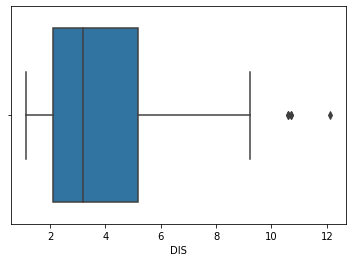

In [ ]:
sns.boxplot( x=boston_df['DIS'] )

In [ ]:
# Position of the Outlier
print(np.where(boston_df['DIS']>10))

(array([351, 352, 353, 354, 355]),)


結論：上圖顯示 10 到 12 之間的五個點，這些是異常值，因為沒有包含在其他觀察的框中，即沒有靠近四分位數。

### 偵測

In [ ]:
# IQR
Q1 = np.percentile(boston_df['DIS'], 25, interpolation='midpoint') 
Q3 = np.percentile(boston_df['DIS'], 75, interpolation='midpoint') 
IQR = Q3 - Q1 
print(IQR)

3.0646000000000004


In [ ]:
# Above Upper bound
upper = boston_df['DIS'] >= (Q3+1.5*IQR)
  
print('Upper bound: ', upper)
print('='*20)
print(np.where(upper))
  
# Below Lower bound
lower = boston_df['DIS'] <= (Q1-1.5*IQR)
print('Lower bound: ', lower)
print('='*20)
print(np.where(lower))

Upper bound:  0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355]),)
Lower bound:  0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)


### 處理

為了去除異常值，必須遵循使用其在數據集中的確切位置從數據集中刪除條目的相同過程，因為在上述所有檢測異常值的方法中，最終結果是滿足異常值定義的所有數據項的列表根據使用的方法。

In [ ]:
print('Old Shape: ', boston_df.shape)

# Removing the Outliers 
boston_df.drop(np.where(upper)[0].tolist(), inplace=True)

print('New Shape: ', boston_df.shape) 

Old Shape:  (506, 13)
New Shape:  (501, 13)


## 散佈圖

* 散點圖是一種類型的曲線圖，或者使用笛卡爾坐標來對一組數據的顯示通常是兩個變量的值的數學圖中。數據顯示為一組點，每個點都有一個變量的值確定水平軸上的位置，另一個 變量的值確定垂直軸上的位置。

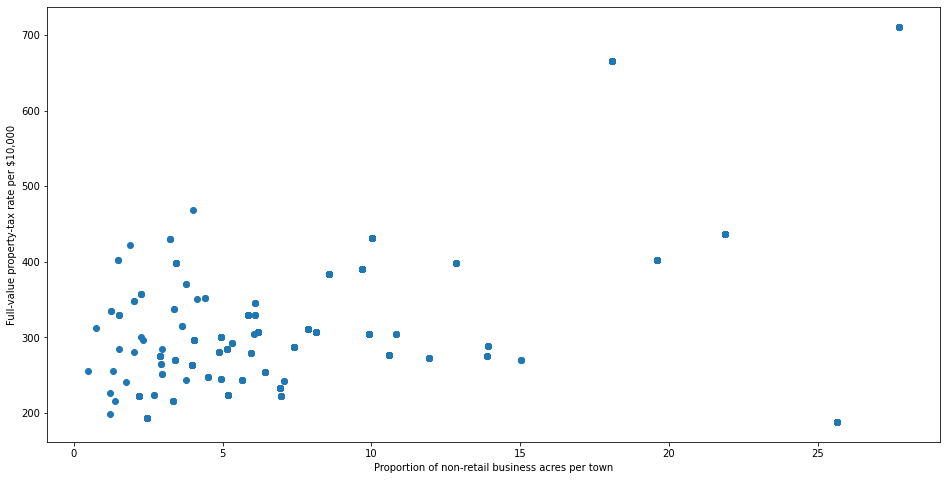

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
# Scatter plot
ax.scatter(boston_df['INDUS'], boston_df['TAX'])

# x-axis label
ax.set_xlabel('Proportion of non-retail business acres per town')

# y-axis label
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

查看圖表可以總結出大多數數據點位於圖表的左下角，但很少有點正好相反，即圖表的右上角。右上角的那些點可以被視為異常值。

使用近似可以說所有 x>20 和 y>600 的數據點都是異常值。以下代碼可以獲取滿足這些條件的所有點的確切位置。

In [ ]:
# Position of the Outlier
print(np.where((boston_df['INDUS']>20) & (boston_df['TAX']>600)))

(array([483, 484, 485, 486, 487]),)


# 分布型態：偏態與峰態

## 偏態 (Skewness)

* 說明：衡量資料分佈的不對稱性與偏斜方向程度，是統計資料分佈非對稱程度的數字特徵。
* 類型：
  * 負偏態或左偏態 ($Skewness<0$)：左側的尾部更長，分布的主體集中在右側，左側有較多極端值
  * 正偏態或右偏態 ($Skewness>0$)：右側的尾部更長，分布的主體集中在左側，右側有較多極端值，日常生活數據常見右偏態分布
  * 如果分布對稱 ($Skewness=0$)，那麼平均值=中位數，偏度為零 (此外，如果分布為單峰分布，那麽平均值=中位數=眾數)
* 語法
  ```
  stats.skew(data)
  ```

* 定義：有 𝑛 元素的數據集
  * 常用：$(n^2/((n-1)(n-2)))(\sum_i(x_i-mean(x))^3/(ns^3))$
  * 調整後的 Fisher-Pearson 標準化矩係數： $\sum_i(x_i-mean(x))^3 n/((n-1)(n-2)s^3)$，其中 $i=1,2,...,n$


![Skew](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content/skew.png)

## 峰態 (Kurtosis)

* 說明：峰態反映了峰部的尖度，也代表變異數的來源來自於不常出現的尾巴兩端的數值
* 類型：
  * 高峻峰：k>0
  * 常態峰：k=0
  * 低闊峰：k<0
* 資料中越可能會出現數值很極端的離群值
  ```
  stats.kurtosis(data)
  ```

![Kurtosis](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content/kurtosis.png)

### 範例一

* 匯入資料

In [ ]:
boys=[164, 176, 169, 169, 165, 175, 159, 151, 144, 160,
      183, 165, 156, 170, 164, 173, 165, 163, 177, 171]
girl=[169, 183, 170, 168, 182, 170, 173, 185, 151, 156,
      162, 169, 162, 181, 159, 154, 167, 175, 170, 160]

* 計算峰度和偏度

In [ ]:
print('偏度=', stats.skew(boys))
print('峰度=', stats.kurtosis(boys))

偏度= -0.47132127317376954
峰度= 0.19395882957876331


* 設定參數：bias=False，啟用對統計偏差的校正

In [ ]:
print('偏度=', stats.skew(boys, bias=False))
print('峰度=', stats.kurtosis(boys, bias=False, fisher=True))

偏度= -0.5104301688842507
峰度= 0.6254561209213283


* 自訂函數：與設定 bias=False 相同

In [ ]:
n = len(boys)
mean_boys = sum(boys) / n
var_boys = sum((item - mean_boys)**2 for item in boys) / (n - 1)
std_boys = var_boys ** 0.5
skew_boys = (sum((item - mean_boys)**3 for item in boys)
        * n / ((n - 1) * (n - 2) * std_boys**3))
print(skew_boys)

-0.5104301688842505


* 檢定是否符合標準常態分布

In [ ]:
stats.jarque_bera(boys)

(0.7718291647967804, 0.6798285925281997)

p 值為 0.67982859 > 0.05，因此沒有足夠的證據拒絕虛無假設 $H_0$，顯著此為標準常態分布

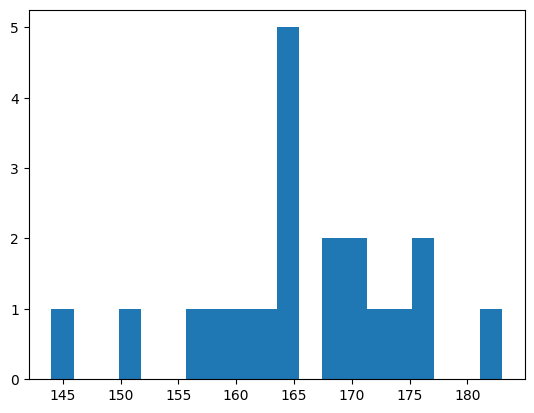

In [ ]:
plt.style.use( 'default' )

plt.hist( boys, bins=20 )
plt.show()

### 範例二：結合軸的概念

In [ ]:
df = pd.DataFrame(np.array([[85, 68, 90], [82, 63, 88], [84, 90, 78]]), 
                  columns=['數學', '英文', '國文'], 
                  index=['小美', '小王', '小豬'])
df

,數學,英文,國文
小美,85,68,90
小王,82,63,88
小豬,84,90,78


* axis可以採用以下任何值：
  * axis=None：計算數組中所有數據的統計信息。上面的例子是這樣工作的。此行為通常是 NumPy 中的默認設置。
  * axis=0：計算所有行的統計信息，即數組的每一列。這種行為通常是 SciPy 統計函數的默認行為。
  * axis=1：計算所有列的統計信息，即數組的每一行。

計算第二行的偏度：

In [ ]:
df.iloc[1, :].skew()

-1.3294040702410526

計算所有列的偏度：

In [ ]:
df.skew(axis = 0)

數學   -0.935220
英文    1.498959
國文   -1.545393
dtype: float64

計算所有行的偏度：

In [ ]:
df.skew(axis = 1)

小美   -1.373033
小王   -1.329404
小豬    0.000000
dtype: float64

# 結語 

本篇文章介紹常見偵測與處理離群值的方法，以及統計如何透過統計量來瞭解分布情形，讀者可透過本篇文章的介紹更進一步瞭解如何觀察資料的樣貌。<br>
針對本文的內容，若讀者們有發現任何的錯誤或疑問，非常歡迎您 [來信 sueshow2006@gmail.com](mailto:sueshow2006@gmail.com) 給予建議及討論，讓我們一同來學習成長！

# 參考資料

* [模擬的機率分佈：統計方法的實證作用](https://scgeeker.github.io/BasicStatistics/distribution.html)
* [30天搞懂Python-常態分配](https://ithelp.ithome.com.tw/articles/10239607)
* [python 如何判斷一組數據是否符合正態分布](https://codingnote.cc/zh-tw/p/149154/)
* [统计概率思维及几种分布的Python实现](https://zhuanlan.zhihu.com/p/268212254)
* [統計學：常態分佈、平均值、變異數與標準差](http://slashview.com/archive2014/20140506.html)
* [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
* [機器學習百日馬拉松Day9:離群值(Outlier)及其處理](https://slony958.wordpress.com/2020/11/02/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%99%BE%E6%97%A5%E9%A6%AC%E6%8B%89%E6%9D%BEday9%E9%9B%A2%E7%BE%A4%E5%80%BCoutlier%E5%8F%8A%E5%85%B6%E8%99%95%E7%90%86/)
* [5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know (Python Code)](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
* [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
* [機器學習百日馬拉松Day9:離群值(Outlier)及其處理](https://slony958.wordpress.com/2020/11/02/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%99%BE%E6%97%A5%E9%A6%AC%E6%8B%89%E6%9D%BEday9%E9%9B%A2%E7%BE%A4%E5%80%BCoutlier%E5%8F%8A%E5%85%B6%E8%99%95%E7%90%86/)
* [4 Automatic Outlier Detection Algorithms in Python](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)

# 返回 [課程大綱](https://github.com/AI-FREE-Team/Machine-Learning-Basic#%E8%AA%B2%E7%A8%8B%E5%A4%A7%E7%B6%B1-course-outline)